In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("googleplaystore.csv")

In [5]:
data.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [24]:
data.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [25]:
data.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [26]:
data.shape

(10840, 13)

In [27]:
data.describe()

,Rating
count,9366.000000
mean,4.191757
std,0.515219
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,5.000000


In [28]:
data.boxplot()

<AxesSubplot:>

In [29]:
data.hist()

array([[<AxesSubplot:title={'center':'Rating'}>]], dtype=object)

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  object 
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.2+ MB


In [31]:
data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

In [55]:
data[data.Rating > 5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [33]:
data.drop([10472],inplace=True)

KeyError: '[10472] not found in axis'

In [56]:
data[10470:10475]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10470,Jazz Wi-Fi,COMMUNICATION,3.4,49,4.0M,10000.0,Free,0.0,Everyone,Communication,"February 10, 2017",0.1,2.3 and up
10471,Xposed Wi-Fi-Pwd,PERSONALIZATION,3.5,1042,404k,100000.0,Free,0.0,Everyone,Personalization,"August 5, 2014",3.0.0,4.0.3 and up
10473,osmino Wi-Fi: free WiFi,TOOLS,4.2,134203,4.1M,10000000.0,Free,0.0,Everyone,Tools,"August 7, 2018",6.06.14,4.4 and up
10474,Sat-Fi Voice,COMMUNICATION,3.4,37,14M,1000.0,Free,0.0,Everyone,Communication,"November 21, 2014",2.2.1.5,2.2 and up
10475,Wi-Fi Visualizer,TOOLS,3.9,132,2.6M,50000.0,Free,0.0,Everyone,Tools,"May 17, 2017",0.0.9,2.3 and up


In [57]:
a = data.boxplot()

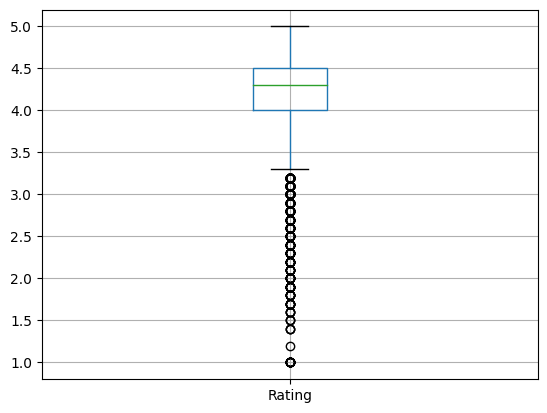

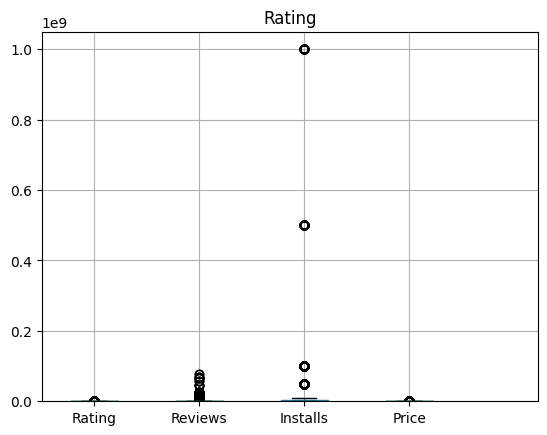

In [58]:
plt.show()

In [59]:
data.shape

(10840, 13)

In [60]:
data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          0
Android Ver          0
dtype: int64

In [61]:
def impute_median(series):
    return series.fillna(series.median())

# Apply user defined function into Rating Column:
data.Rating=data['Rating'].transform(impute_median)

In [62]:
data.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [ ]:
print(data['Type'].mode())

In [ ]:
print(data['Current Ver'].mode())

In [35]:
print(data['Android Ver'].mode())

0    4.1 and up
Name: Android Ver, dtype: object


In [36]:
# Find the Null values from Type Column and Replace by Mode
data['Type'].fillna(str(data['Type'].mode().values[0]),inplace=True)

In [37]:
# Find the Null values from Current Ver Column and Replace by Mode
data['Current Ver'].fillna(str(data['Current Ver'].mode().values[0]),inplace=True)

In [38]:
# # Find the Null vaues from Andtroid Ver Column and Replace by Mode
data['Android Ver'].fillna(str(data['Android Ver'].mode().values[0]),inplace=True)

In [39]:
data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          0
Android Ver          0
dtype: int64

In [40]:
data.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [41]:
# convet price and review and rating into numerical Column
data['Price']=data['Price'].apply(lambda x: str(x).replace('$','')if '$' in str(x) else str(x))

In [42]:
data['Price']=data['Price'].apply(lambda x: float(x))

In [43]:
data.describe()

,Rating,Price
count,9366.000000,10840.000000
mean,4.191757,1.027368
std,0.515219,15.949703
min,1.000000,0.000000
25%,4.000000,0.000000
50%,4.300000,0.000000
75%,4.500000,0.000000
max,5.000000,400.000000


In [44]:
data['Reviews']=pd.to_numeric(data['Reviews'],errors='coerce')

In [45]:
data['Installs']=data['Installs'].apply(lambda x: str(x).replace('+','')if '+' in str(x) else str(x))

In [46]:
data['Installs']=data['Installs'].apply(lambda x: str(x).replace(',','')if ',' in str(x) else str(x))
data['Installs']=data['Installs'].apply(lambda x: float(x))

In [47]:
data.describe()

,Rating,Reviews,Installs,Price
count,9366.000000,1.084000e+04,1.084000e+04,10840.000000
mean,4.191757,4.441529e+05,1.546434e+07,1.027368
std,0.515219,2.927761e+06,8.502936e+07,15.949703
min,1.000000,0.000000e+00,0.000000e+00,0.000000
25%,4.000000,3.800000e+01,1.000000e+03,0.000000
50%,4.300000,2.094000e+03,1.000000e+05,0.000000
75%,4.500000,5.477550e+04,5.000000e+06,0.000000
max,5.000000,7.815831e+07,1.000000e+09,400.000000


In [48]:
# Group the App Based on the Category
grp=data.groupby('Category')
x=grp['Rating'].agg(np.mean)

In [49]:
result = sorted(x.items(), key=lambda x: x[1], reverse=True)[:5]
print
import operator
result1=dict(sorted(x.items(), key=operator.itemgetter(1), reverse=True)[:5])
print(x.max())
x.hist()

4.435555555555555


<AxesSubplot:title={'center':'Rating'}>

In [50]:
x.hist()
y=grp['Price'].agg(np.sum)
result1 = sorted(y.items(), key=lambda x: x[1], reverse=True)[:5]

In [51]:
print(result1)

[('FINANCE', 2900.83), ('FAMILY', 2434.78), ('LIFESTYLE', 2360.87), ('MEDICAL', 1439.96), ('GAME', 287.3)]


In [52]:
z=grp['Reviews'].agg(np.mean)
result2 = sorted(z.items(), key=lambda x: x[1], reverse=True)[:5]
print(z)

Category
ART_AND_DESIGN         2.637600e+04
AUTO_AND_VEHICLES      1.369019e+04
BEAUTY                 7.476226e+03
BOOKS_AND_REFERENCE    9.506090e+04
BUSINESS               3.033598e+04
COMICS                 5.638793e+04
COMMUNICATION          2.107138e+06
DATING                 3.115931e+04
EDUCATION              2.538191e+05
ENTERTAINMENT          3.971688e+05
EVENTS                 2.515906e+03
FAMILY                 2.080255e+05
FINANCE                4.795281e+04
FOOD_AND_DRINK         6.994748e+04
GAME                   1.385859e+06
HEALTH_AND_FITNESS     1.111253e+05
HOUSE_AND_HOME         4.518619e+04
LIBRARIES_AND_DEMO     1.220139e+04
LIFESTYLE              3.372457e+04
MAPS_AND_NAVIGATION    2.237902e+05
MEDICAL                3.425432e+03
NEWS_AND_MAGAZINES     1.922292e+05
PARENTING              1.597218e+04
PERSONALIZATION        2.279238e+05
PHOTOGRAPHY            6.373631e+05
PRODUCTIVITY           2.691438e+05
SHOPPING               4.424662e+05
SOCIAL             

In [53]:
print(result2)

[('COMMUNICATION', 2107137.622739018), ('SOCIAL', 2105903.125423729), ('GAME', 1385858.6966783216), ('PHOTOGRAPHY', 637363.1343283582), ('VIDEO_PLAYERS', 630743.9314285715)]


In [54]:
print(x)

Category
ART_AND_DESIGN         4.358065
AUTO_AND_VEHICLES      4.190411
BEAUTY                 4.278571
BOOKS_AND_REFERENCE    4.346067
BUSINESS               4.121452
COMICS                 4.155172
COMMUNICATION          4.158537
DATING                 3.970769
EDUCATION              4.389032
ENTERTAINMENT          4.126174
EVENTS                 4.435556
FAMILY                 4.192272
FINANCE                4.131889
FOOD_AND_DRINK         4.166972
GAME                   4.286326
HEALTH_AND_FITNESS     4.277104
HOUSE_AND_HOME         4.197368
LIBRARIES_AND_DEMO     4.178462
LIFESTYLE              4.094904
MAPS_AND_NAVIGATION    4.051613
MEDICAL                4.189143
NEWS_AND_MAGAZINES     4.132189
PARENTING              4.300000
PERSONALIZATION        4.335987
PHOTOGRAPHY            4.192114
PRODUCTIVITY           4.211396
SHOPPING               4.259664
SOCIAL                 4.255598
SPORTS                 4.223511
TOOLS                  4.047411
TRAVEL_AND_LOCAL       4.109292

C:\Users\suyas\AppData\Local\Temp\ipykernel_13896\1370206657.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(x,rotation='vertical',size=8)


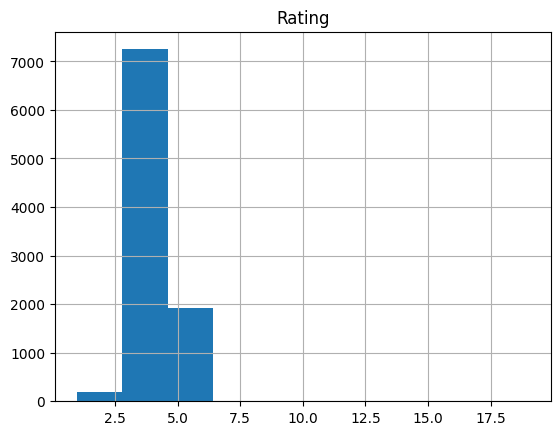

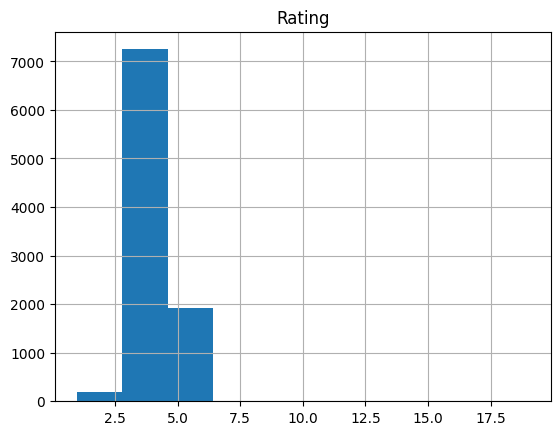

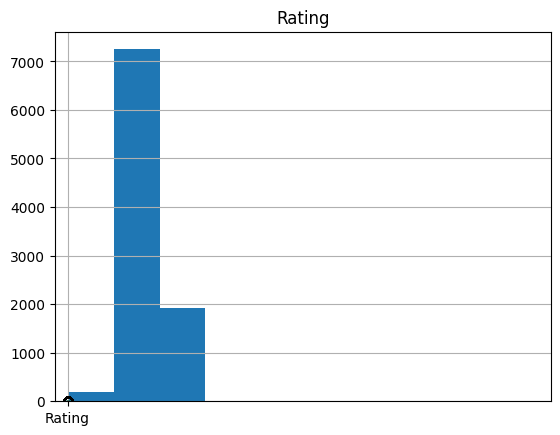

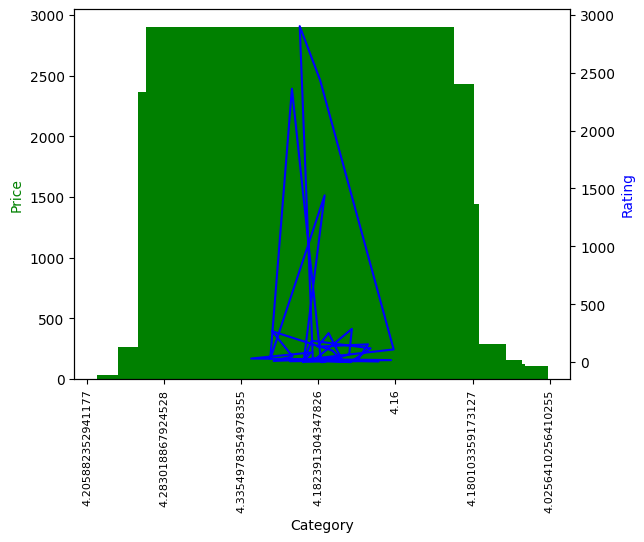

In [47]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.bar(x,y, color='g')
ax2.plot(x, y, 'b')
ax1.set_xlabel('Category')
ax1.set_ylabel('Price', color='g')
ax2.set_ylabel('Rating', color='b')
ax1.set_xticklabels(x,rotation='vertical',size=8)
plt.show()


C:\Users\suyas\AppData\Local\Temp\ipykernel_13896\2003703407.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x,'r--',color='r')


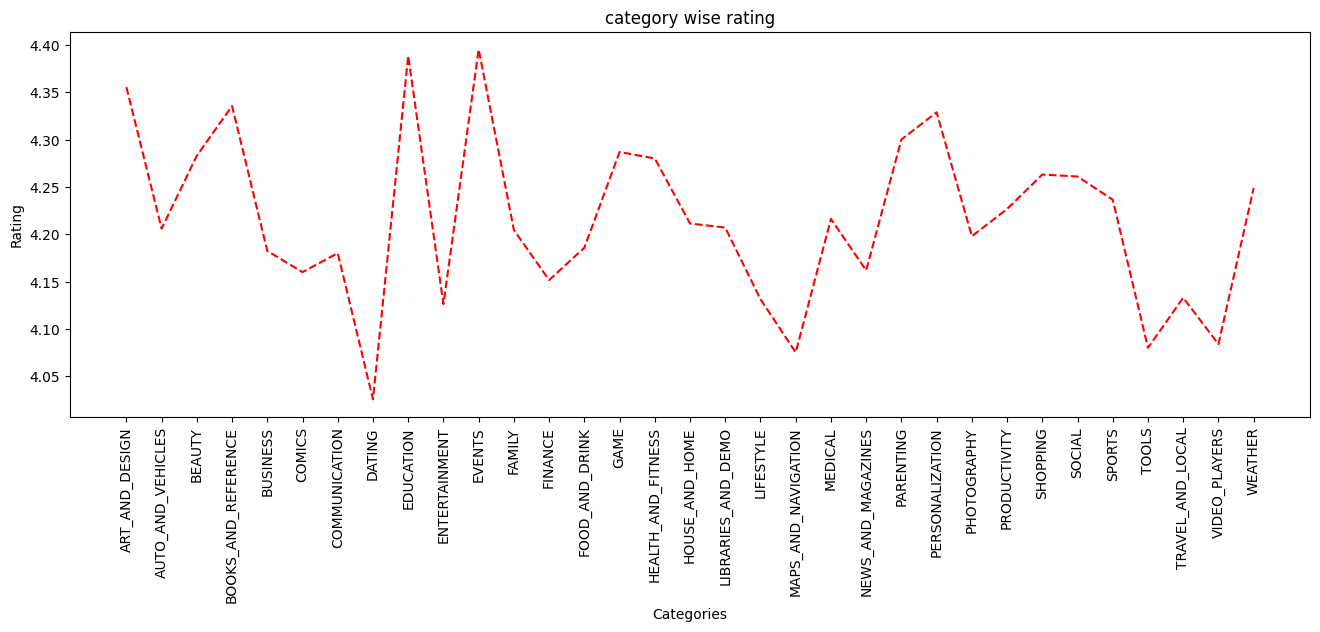

In [48]:
plt.figure(figsize=(16,5))
plt.plot(x,'r--',color='r')
plt.xticks(rotation=90)
plt.title("category wise rating")
plt.xlabel('Categories')
plt.ylabel('Rating')
plt.show()


C:\Users\suyas\AppData\Local\Temp\ipykernel_13896\2887286905.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.
  plt.plot(y,'r--',color='r')


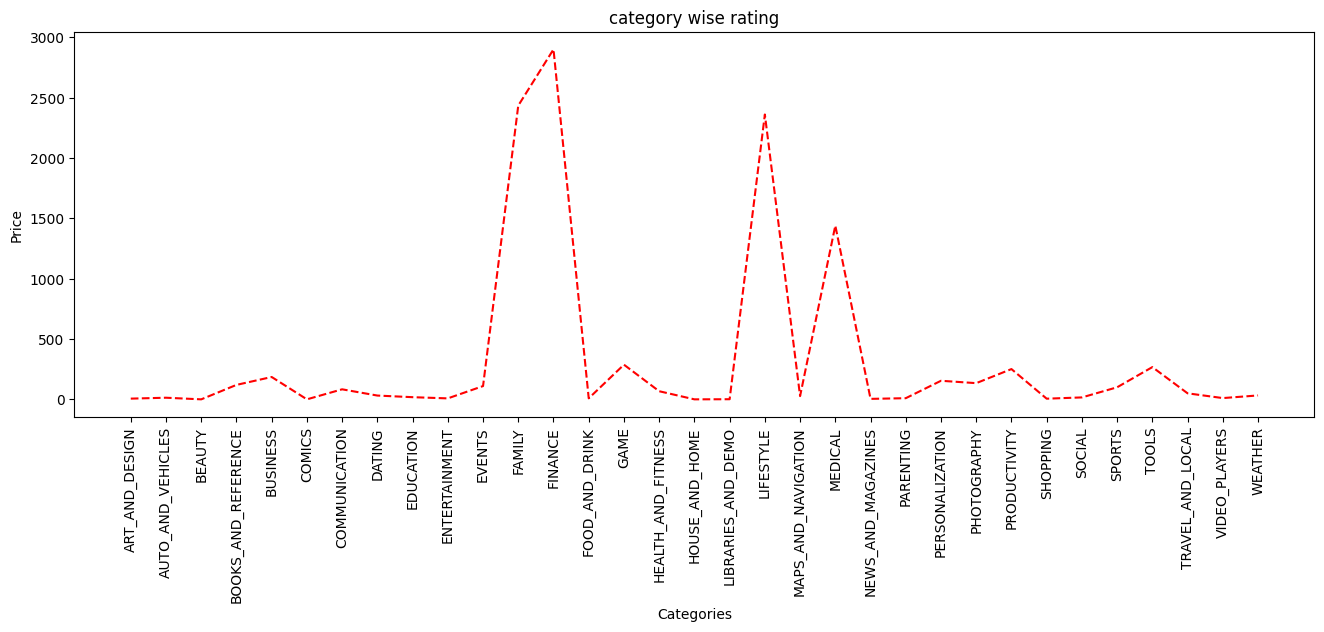

In [49]:
plt.figure(figsize=(16,5))
plt.plot(y,'r--',color='r')
plt.xticks(rotation=90)
plt.title("category wise rating")
plt.xlabel('Categories')
plt.ylabel('Price')
plt.show()


C:\Users\suyas\AppData\Local\Temp\ipykernel_13896\3302412376.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.
  plt.plot(z,'r--',color='b')


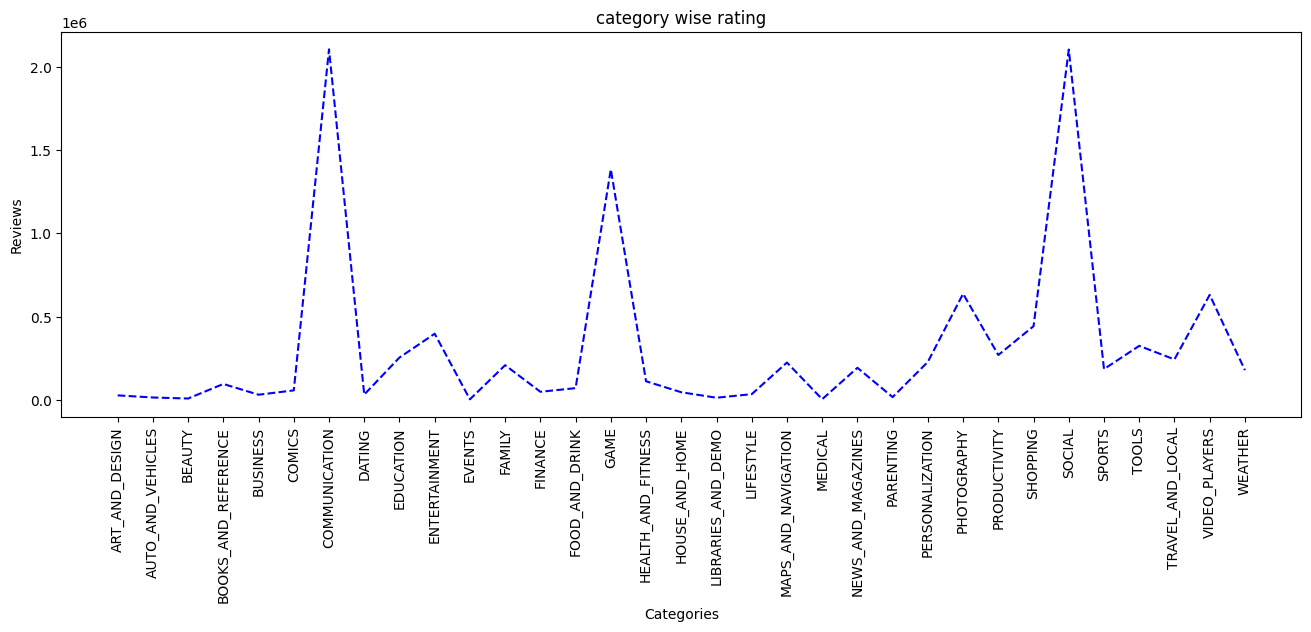

In [50]:
plt.figure(figsize=(16,5))
plt.plot(z,'r--',color='b')
plt.xticks(rotation=90)
plt.title("category wise rating")
plt.xlabel('Categories')
plt.ylabel('Reviews')
plt.show()